In [12]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import DensityMatrix


In [33]:
qr = QuantumRegister(1, name='qr')
cr = ClassicalRegister(1, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')

qc.sx(qr[0])

qc.draw()

matrix_qiskit = DensityMatrix(qc)
state_vector_qiskit = Statevector(qc)

print(matrix_qiskit)
state_vector_qiskit.draw("latex")

CircuitError: 'The circuit contains non-unitary operations and cannot be controlled. Note that no qiskit.circuit.Instruction objects may be in the circuit for this operation.'

{1: 0.49904, 0: 0.50096}


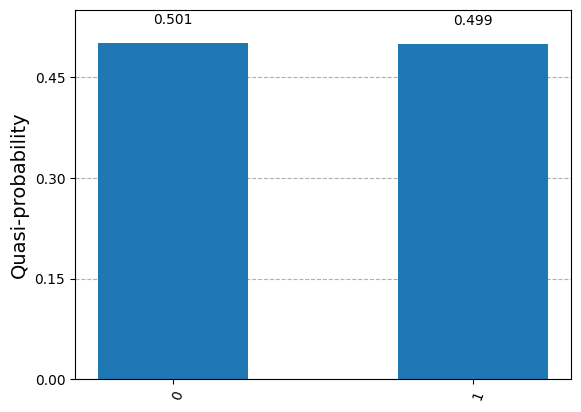

In [7]:
# execute the quantum circuit
qc.measure(qr, cr)
quasi_dists = Sampler().run(qc, shots=100000).result().quasi_dists[0]
print(quasi_dists)
plot_histogram(quasi_dists)

In [27]:



qc_decomposed = qc.decompose()#.decompose()
print(qasm2.dumps(qc_decomposed))
qc_decomposed.draw()

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[1];
creg cr[1];
sdg qr[0];
h qr[0];
sdg qr[0];


global phase: π/4
      ┌─────┐┌───┐┌─────┐
  qr: ┤ Sdg ├┤ H ├┤ Sdg ├
      └─────┘└───┘└─────┘
cr: 1/═══════════════════

In [31]:
# import
qasm_str = """
OPENQASM 2.0;
include "qelib1.inc";

qreg qr[1];
creg cr[1];
u1(1.5*pi) qr[0];
u2(0.0*pi,1.0*pi) qr[0];
u1(1.5*pi) qr[0];
"""

qasm_str = """
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[1];
creg cr[1];
sdg qr[0];
h qr[0];
sdg qr[0];
"""


from qiskit import qasm2
qc_import = qasm2.loads(qasm_str, custom_instructions=qasm2.LEGACY_CUSTOM_INSTRUCTIONS)
qc_import.draw()
matrix_pytket = DensityMatrix(qc_import)
state_vector_pytket = Statevector(qc_import)
print(matrix_pytket)
state_vector_pytket.draw("latex")


DensityMatrix([[0.5+0.j , 0. +0.5j],
               [0. -0.5j, 0.5+0.j ]],
              dims=(2,))


<IPython.core.display.Latex object>

In [ ]:

# execute the quantum circuit
qc_import.measure(0, 0)
quasi_dists = Sampler().run(qc_import, shots=100000).result().quasi_dists[0]
print(quasi_dists)
plot_histogram(quasi_dists)

In [17]:
# compare two matrices with numpy
import numpy as np
np.allclose(matrix_qiskit.data, matrix_pytket.data)

True

In [18]:
qasm_path_pytket = "qiskit_circuit_30q_10g_1257_47ef88_4ff963_error_min_qc_pytket.qasm"
qasm_path_qiskit = "qiskit_circuit_30q_10g_1257_47ef88_4ff963_error_min_qc_qiskit.qasm"


from mqt import qcec
result = qcec.verify(str(qasm_path_pytket), str(qasm_path_qiskit))
print(result)


{
  "check_time": 0.000314927,
  "checkers": [
    {
      "checker": "decision_diagram_alternating",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    },
    {
      "checker": "zx",
      "equivalence": "equivalent_up_to_global_phase",
      "runtime": 4.9985000000000003e-05
    },
    {
      "checker": "decision_diagram_simulation",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    },
    {
      "checker": "decision_diagram_simulation",
      "equivalence": "no_information",
      "max_nodes": 0,
      "runtime": 0.0
    }
  ],
  "circuit1": {
    "name": "qiskit_circuit_30q_10g_1257_47ef88_4ff963_error_min_qc_pytket",
    "num_gates": 1,
    "num_qubits": 1
  },
  "circuit2": {
    "name": "qiskit_circuit_30q_10g_1257_47ef88_4ff963_error_min_qc_qiskit",
    "num_gates": 1,
    "num_qubits": 1
  },
  "configuration": {
    "application": {
      "alternating": "proportional",
      "simulation": "proportional"

In [20]:
equivalence = str(result.equivalence)
print(equivalence)

equivalent_up_to_global_phase


# Try to create a controlled operation

In [37]:
qc = QuantumCircuit(1)
qc.sx(0)

# create controlled version of the circuit
qc_c = qc.control(1)

# export
qasm_original = qasm2.dumps(qc)
print(qasm_original)
qc_c.draw()

OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
sx q[0];


q4: ───────■───────
    ┌──────┴──────┐
 q: ┤ circuit-251 ├
    └─────────────┘

In [38]:
qc_decomposed = qc_c.decompose()

# export
qasm_decomposed = qasm2.dumps(qc_decomposed)
print(qasm_decomposed)
qc_decomposed.draw()

OPENQASM 2.0;
include "qelib1.inc";
qreg q4[1];
qreg q[1];
p(0) q4[0];
p(pi/2) q[0];
cx q4[0],q[0];
u(-pi/4,0,0) q[0];
cx q4[0],q[0];
u(pi/4,-pi/2,0) q[0];
p(pi/4) q4[0];


┌──────┐                              ┌────────┐   
q4: ─┤ P(0) ├───■───────────────────■──────┤ P(π/4) ├───
    ┌┴──────┴┐┌─┴─┐┌─────────────┐┌─┴─┐┌───┴────────┴──┐
 q: ┤ P(π/2) ├┤ X ├┤ U(-π/4,0,0) ├┤ X ├┤ U(π/4,-π/2,0) ├
    └────────┘└───┘└─────────────┘└───┘└───────────────┘

In [41]:
# store the two qasm to tmp files
import tempfile

with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix=".qasm") as f:
    f.write(qasm_original)
    qasm_path_original = f.name
    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix=".qasm") as f:
        f.write(qasm_decomposed)
        qasm_path_decomposed = f.name
        # check equivalence
        result = qcec.verify(qasm_path_original, qasm_path_decomposed)
        print(result)

{
  "check_time": 0.0,
  "checkers": [],
  "circuit1": {
    "name": "tmppg10nwt3",
    "num_gates": 0,
    "num_qubits": 0
  },
  "circuit2": {
    "name": "tmp9newrm2q",
    "num_gates": 0,
    "num_qubits": 0
  },
  "configuration": {
    "application": {
      "alternating": "proportional",
      "simulation": "proportional"
    },
    "execution": {
      "nthreads": 48,
      "parallel": true,
      "run_alternating_checker": true,
      "run_construction_checker": false,
      "run_simulation_checker": true,
      "run_zx_checker": true,
      "tolerance": 2.2737367544323206e-13
    },
    "functionality": {
      "check_partial_equivalence": false,
      "trace_threshold": 1e-08
    },
    "optimizations": {
      "backpropagate_output_permutation": false,
      "elide_permutations": true,
      "fuse_consecutive_single_qubit_gates": true,
      "reconstruct_swaps": true,
      "remove_diagonal_gates_before_measure": false,
      "reorder_operations": true,
      "transform_dyn